In [1]:
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

%matplotlib inline
%run ../../scripts/plotting_helper.py
from matplotlib import pyplot as plt

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figureS1"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
filetype = "svg"
sc.settings.figdir = output_dir
sc.set_figure_params(format=filetype, transparent=True)
sc.set_figure_params(dpi_save=150, figsize=(2.5, 2.5))


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

plt.style.use("../../scripts/paper_umap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]


# 1B UMAPs of Annotations

In [2]:
# Just the B Cells instead:
bcells = sc.read_h5ad("../data/bcells.h5ad")

# Supplementary Observations

### Verify Activated B Cells in Non-Activated Conditions

# Use MKI67 as a marker for cell cyle

In [5]:
bcells.obs["in vitro"] = bcells.obs["sample_id"].str.contains("Day 4|Day 8|Day 12")

df = sc.get.obs_df(
    bcells,
    keys=["IGHE", "MKI67", "IL4R", "FCER2", "CCL22", "CCL17", "TUBA1B", "IL6R"]
    + ["sample_id", "bcelltype", "in vitro", "celltype"],
    use_raw=True,
)

g = sns.displot(df, kind="ecdf", x="MKI67", hue="in vitro", complementary=True)
g.set(yscale="log")

In [6]:
cycling = df[(df.MKI67 > 0.0)]

bcells.obs.loc[:, "cycling"] = False

In [7]:
# Perform Differential Expression on the cycling Plasma Cells
bcells.obs.loc[cycling.index, "cycling"] = True

In [8]:
# differential expression on MKI67 Plasma B cells
pc = bcells[bcells.obs.bcelltype == "Plasma B cell"]

In [9]:
pc.obs["cycling"] = pc.obs.cycling.astype("category")

Trying to set attribute `.obs` of view, copying.


In [10]:
sc.tl.rank_genes_groups(pc, groupby="cycling")

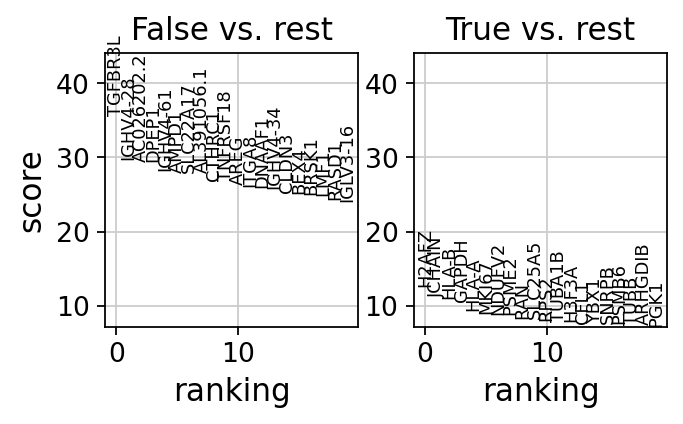

In [11]:
sc.pl.rank_genes_groups(pc)

In [12]:
df = sc.get.obs_df(
    pc,
    keys=[
        "cycling",
        "CORO1A",
        "GAPDH",
        "LDHA",
        "HLA-A",
        "TUBB",
        "PKM",
        "TPI1",
        "IGHE",
        "MKI67",
        "IL4R",
        "FCER2",
        "CCL22",
        "CCL17",
        "IL6R",
    ]
    + ["sample_id", "bcelltype", "celltype"],
    use_raw=True,
)

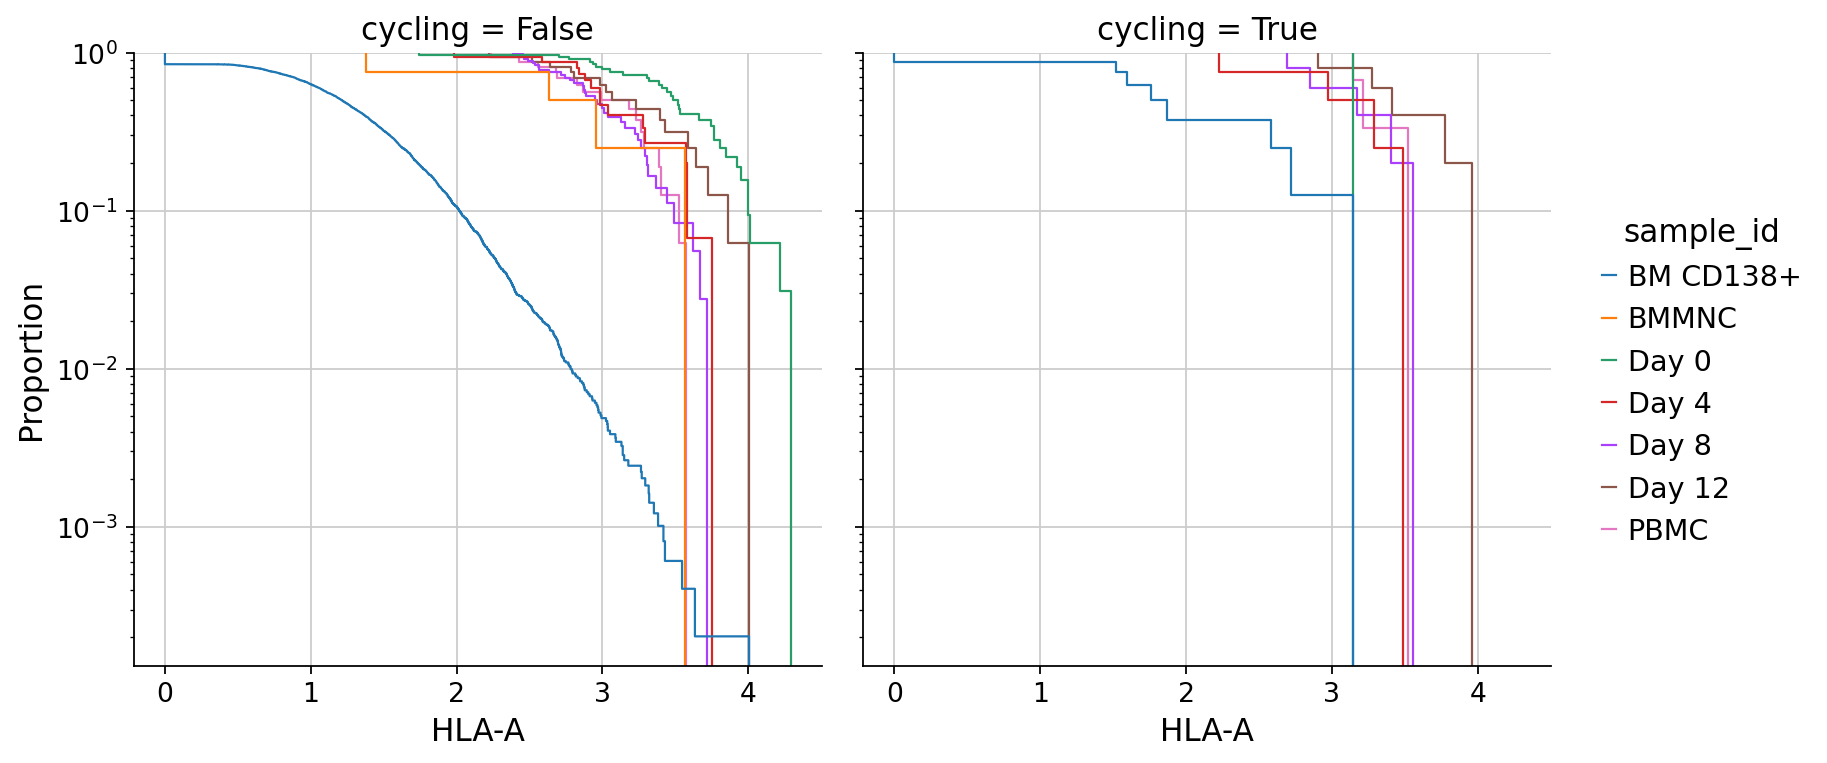

In [13]:
g = sns.displot(
    df, kind="ecdf", x="HLA-A", hue="sample_id", col="cycling", complementary=True
)
g.set(yscale="log")

categories: BM CD138+, BMMNC, Day 0, etc.
var_group_labels: False, True


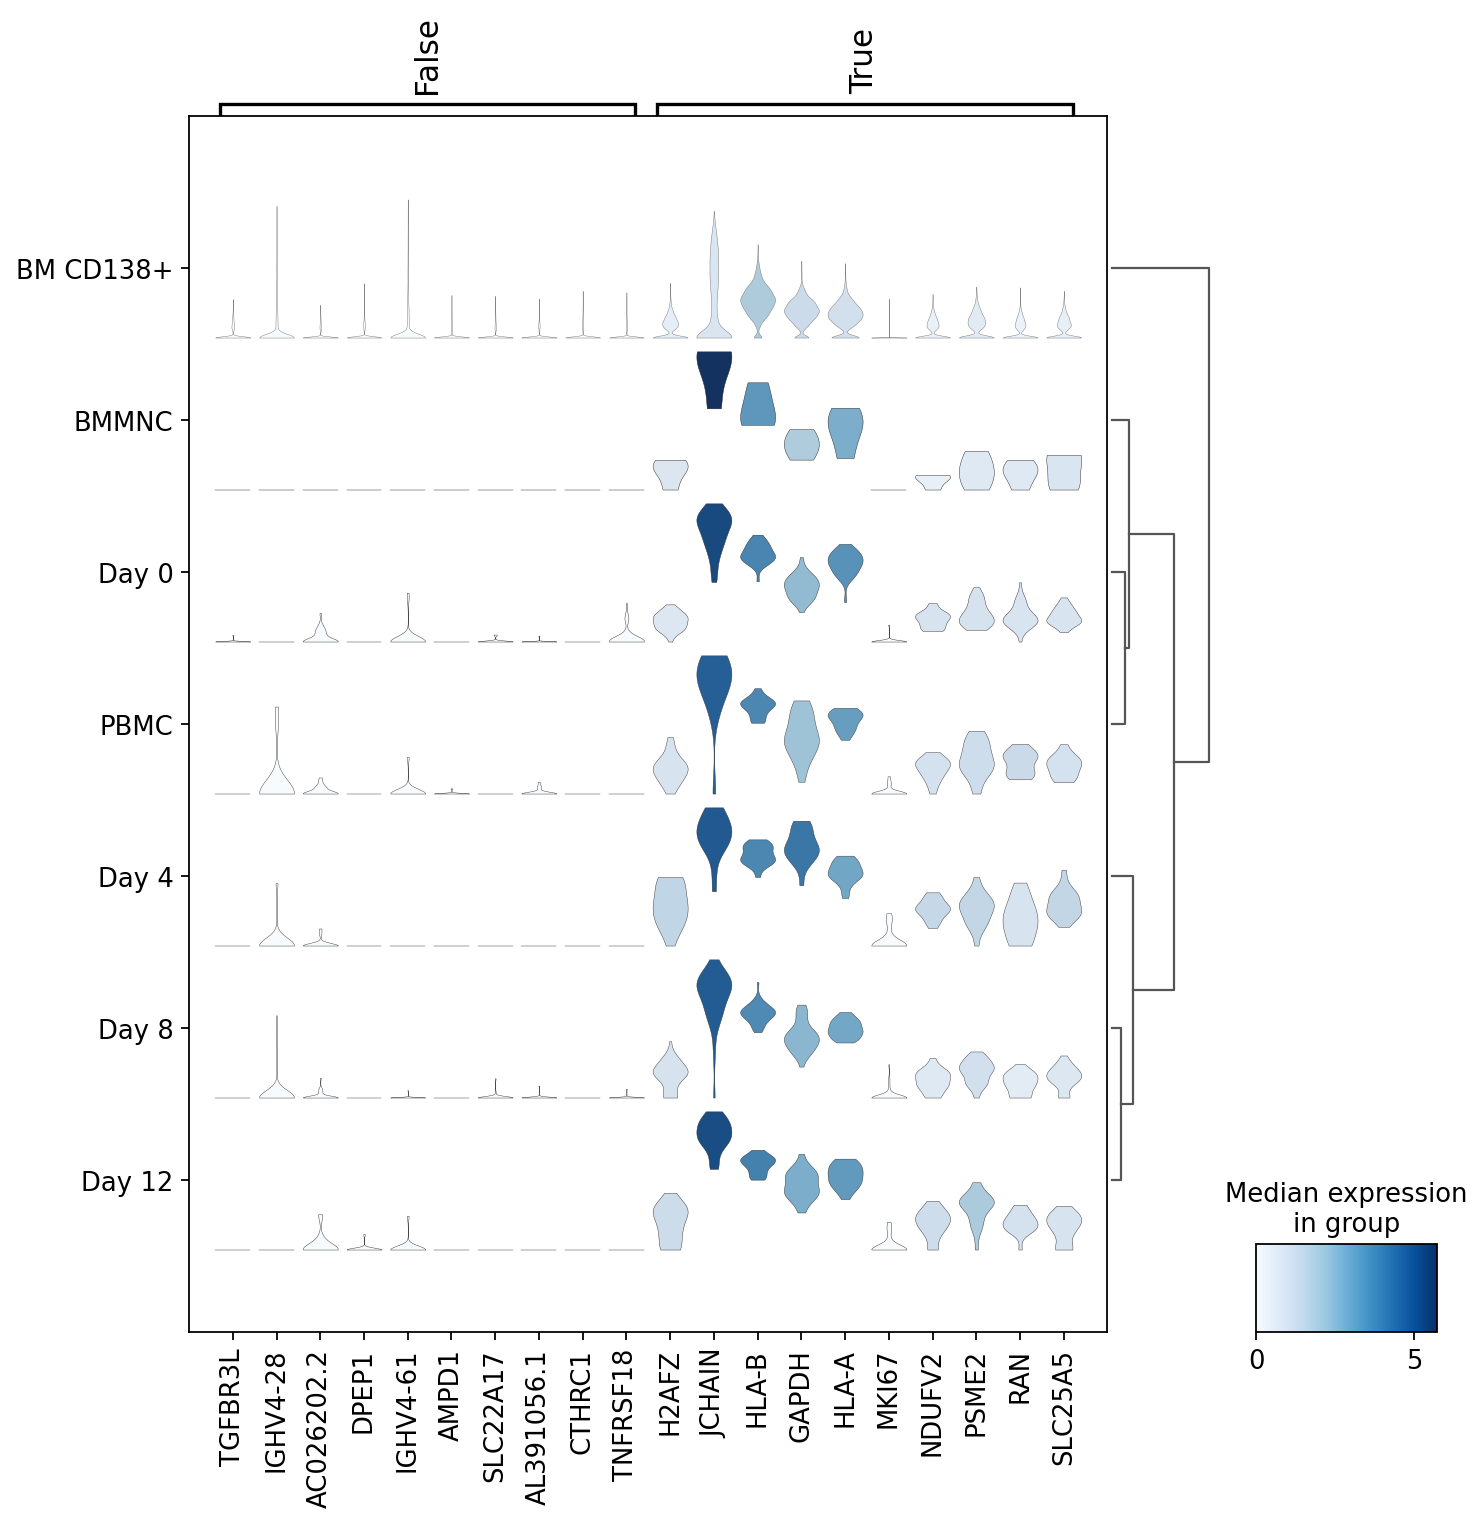

In [14]:
sc.pl.rank_genes_groups_stacked_violin(pc, figsize=(10, 10), groupby="sample_id")

# Learn more about IGHD plasma cells

In [15]:
llpc = bcells[bcells.obs.sample_id.str.contains("BM")]

llpc = llpc[llpc.obs.celltype == "Plasma B cell"]

# remove low abundance category for DE
llpc = llpc[~llpc.obs.isotype_simple.str.contains("IGHE").fillna(False)]

llpc.obs.isotype_simple.value_counts()

IGHA    2666
IGHG    1520
IGHD     520
IGHM      43
Name: isotype_simple, dtype: int64

In [16]:
groupby = "isotype_simple"
sc.tl.rank_genes_groups(llpc, groupby=groupby)

Trying to set attribute `._uns` of view, copying.


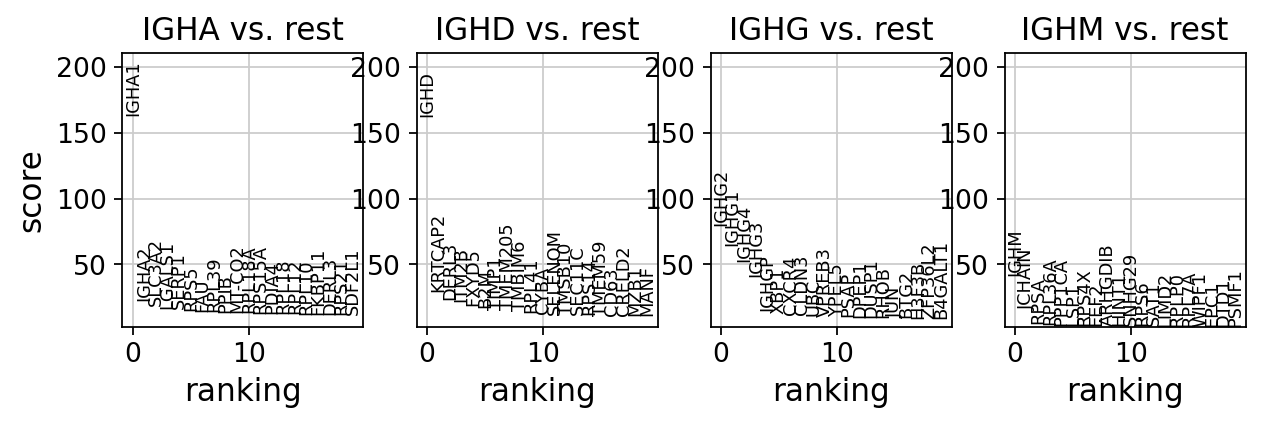

In [17]:
sc.pl.rank_genes_groups(llpc)

In [18]:
sc.tl.dendrogram(llpc, groupby=groupby)

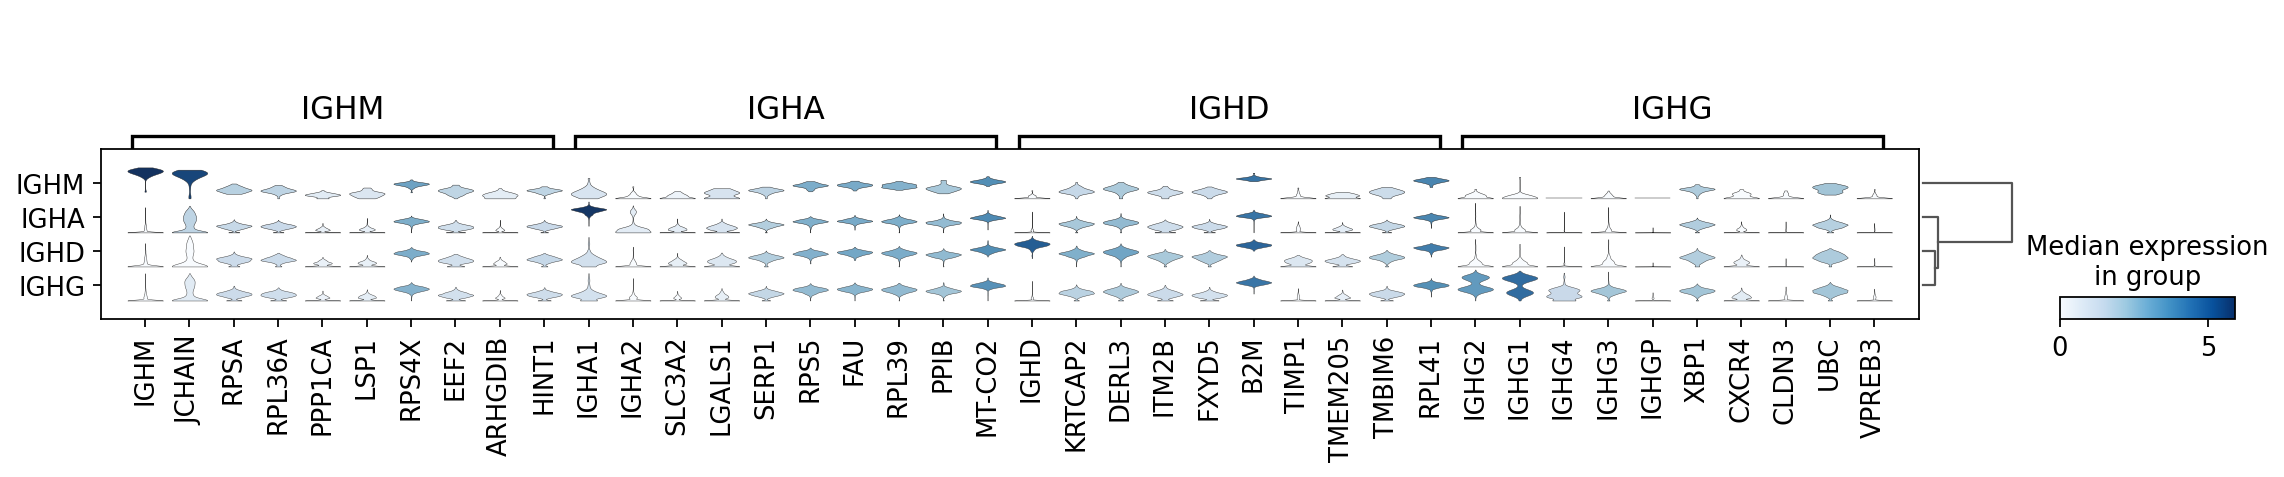

In [19]:
sc.pl.rank_genes_groups_stacked_violin(
    llpc, save="{}_{}.{}".format("llpc", groupby, output_suffix)
)

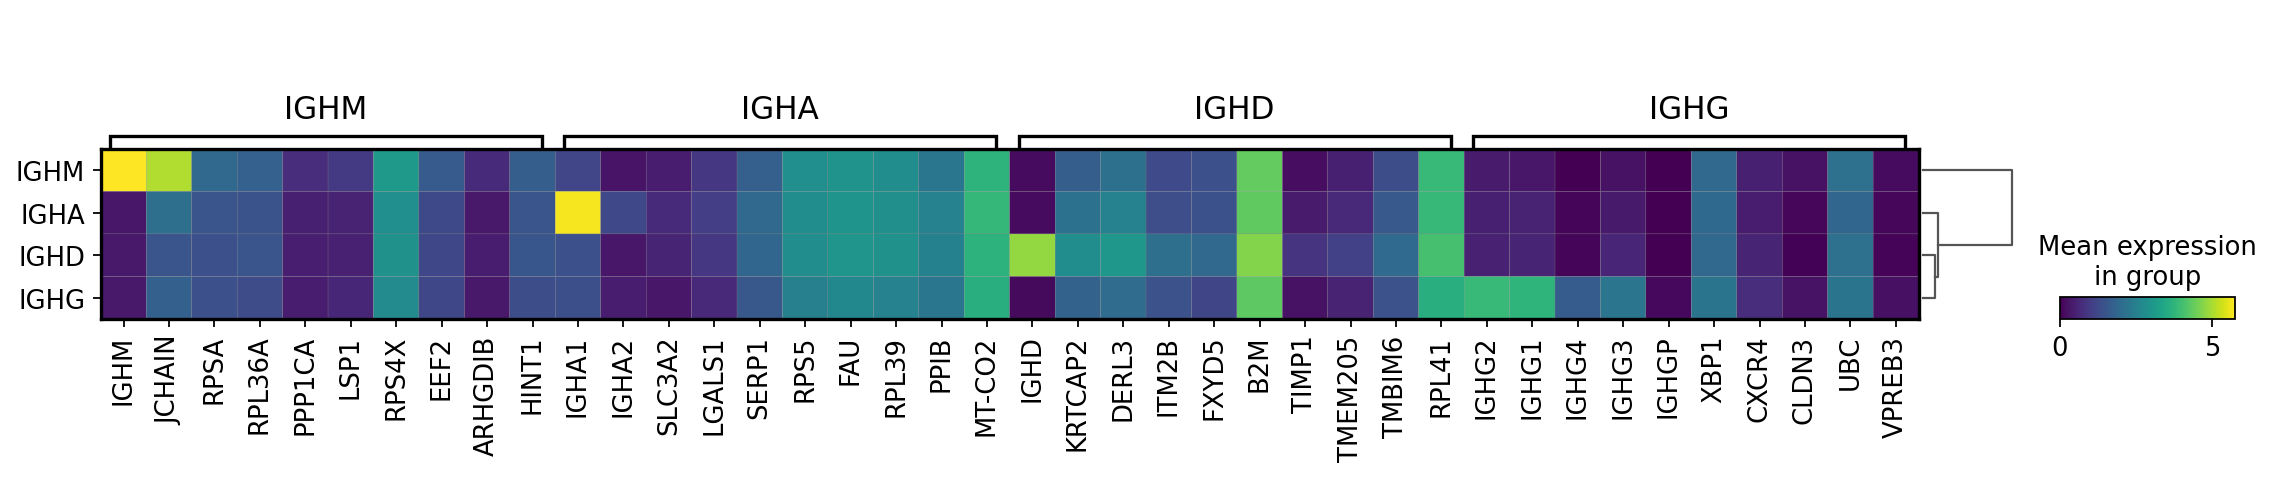

In [20]:
sc.pl.rank_genes_groups_matrixplot(
    llpc, save="{}_{}.{}".format("llpc", groupby, output_suffix)
)

In [21]:
df = sc.get.obs_df(
    llpc,
    keys=[
        "JCHAIN",
        "IGHD",
        "FXYD5",
        "TMEM205",
        "TIMP1",
        "CD38",
        "SDC1",
        "MKI67",
        "isotype_simple",
    ],
    use_raw=True,
)

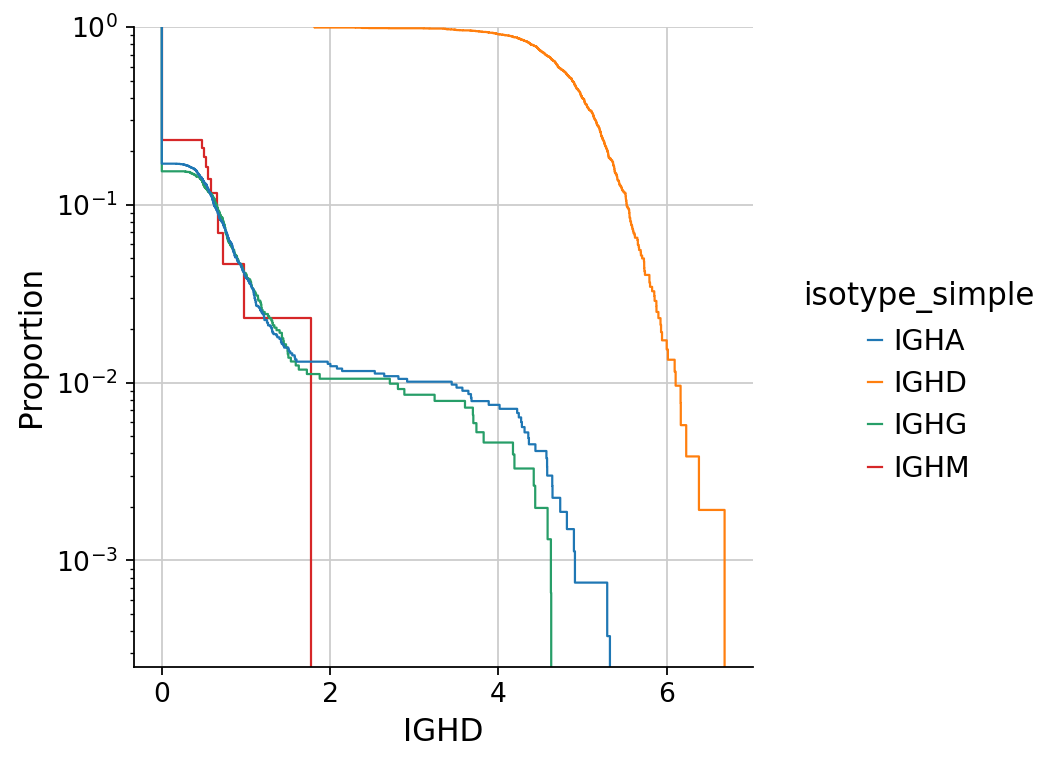

In [22]:
g = sns.displot(df, kind="ecdf", x="IGHD", hue="isotype_simple", complementary=True)
g.set(yscale="log")

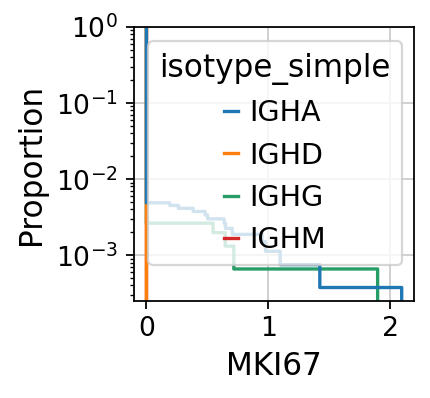

In [23]:
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data=df, x="MKI67", hue="isotype_simple", complementary=True, lw=1.5)
plt.yscale("log")
save_figure(fig, "MKI67_llpcs")

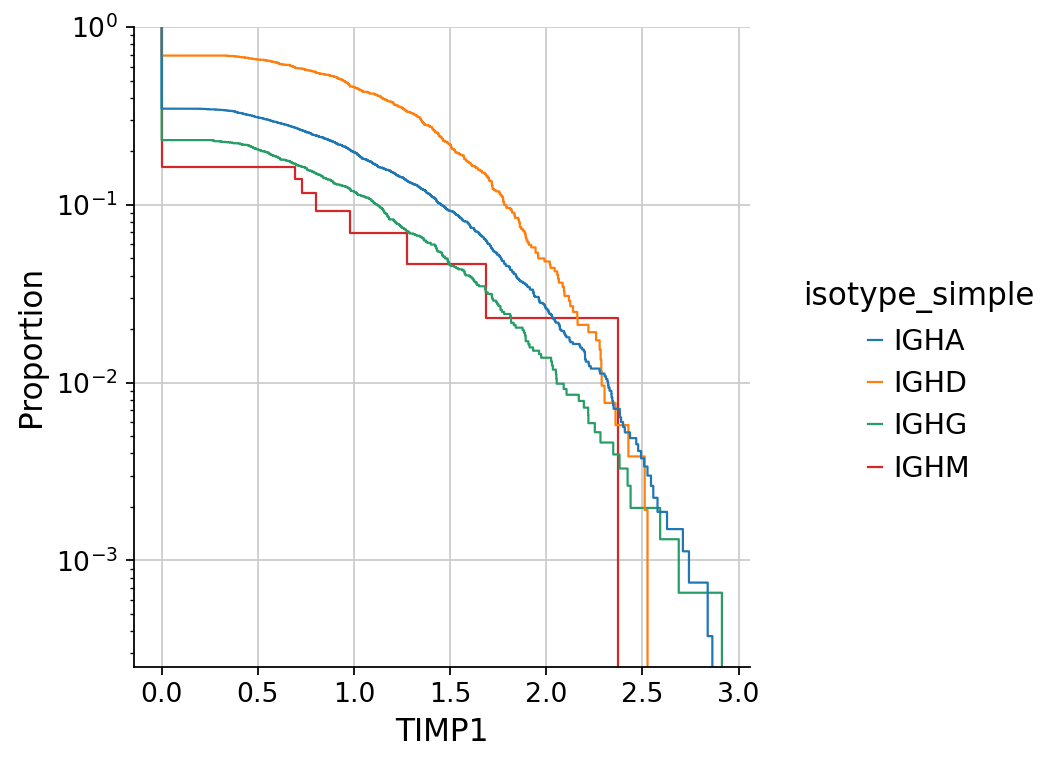

In [24]:
g = sns.displot(df, kind="ecdf", x="TIMP1", hue="isotype_simple", complementary=True)
g.set(yscale="log")

In [25]:
df = sc.get.obs_df(
    llpc,
    keys=[
        "sample_id",
        "bcelltype",
        "celltype",
        "isotype_simple",
        "KRTCAP2",
        "ITM2B",
        "IR_VDJ_1_v_identity",
        "CD38",
        "IGHD",
        "FXYD5",
        "TIMP1",
        "SLC3A2",
        "SDC1",
        "TMEM205",
    ],
    use_raw=True,
)

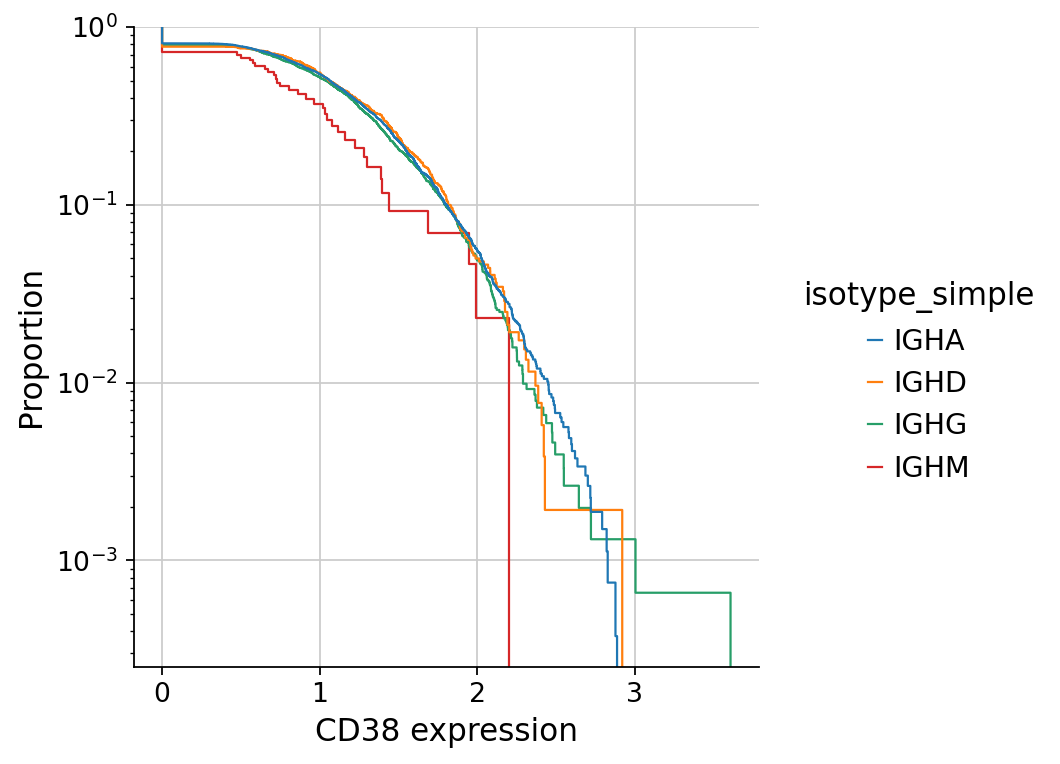

In [26]:
x = "CD38"
g = sns.displot(df, kind="ecdf", x="CD38", hue="isotype_simple", complementary=True)
g.set(yscale="log")
g.set(xlabel=x + " expression")
fig = g.figure

save_figure(fig, "PC_IGH_" + x)

In [27]:
df["fraction_mutated_bases"] = 1 - df["IR_VDJ_1_v_identity"]

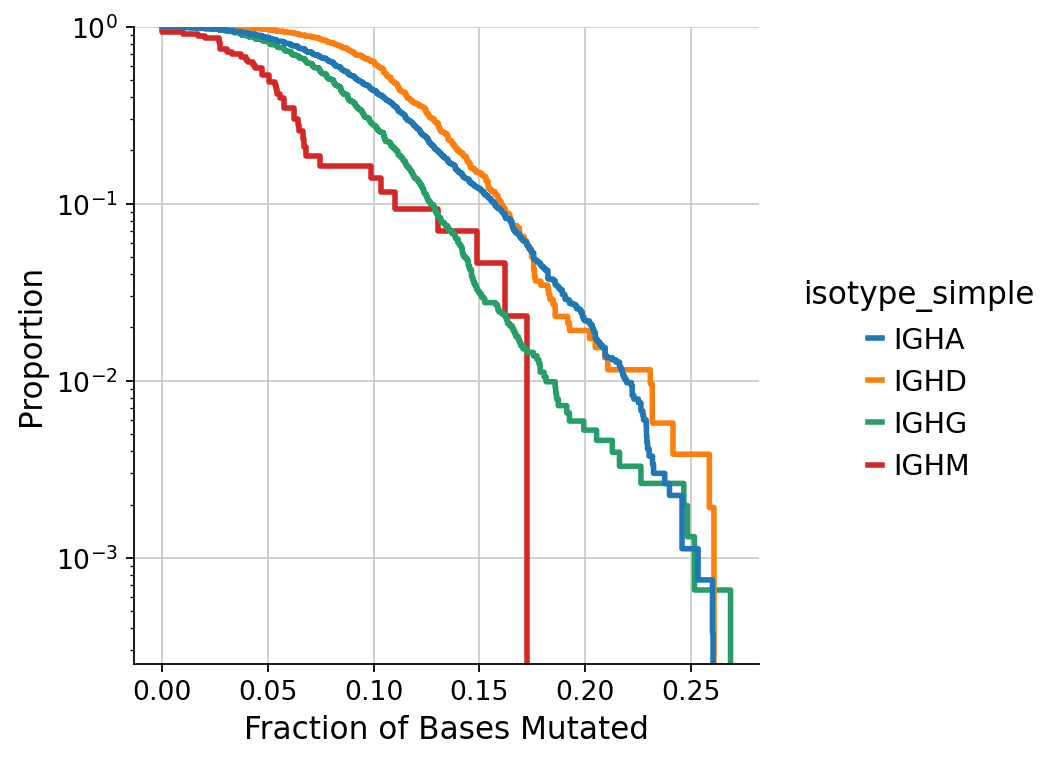

In [28]:
g = sns.displot(
    df,
    kind="ecdf",
    x="fraction_mutated_bases",
    hue="isotype_simple",
    lw=2.5,
    complementary=True,
)
g.set(yscale="log")
fig = g.figure
g.set(xlabel="Fraction of Bases Mutated")

save_figure(fig, "PlasmaCell_Mutation_Levels")

In [29]:
group = "sample_id"
label = "switched"
palette = adata.uns["switched_colors"]
boots = 1000
hold_stats = []
for i in range(boots):
    bootstrap = adata.obs.groupby(group).sample(frac=1, replace=True)
    stats = pd.DataFrame(bootstrap.groupby(group)[label].value_counts(normalize=True))
    stats.columns = ["proportion"]
    hold_stats.append(stats)
data = pd.concat(hold_stats)

data.reset_index(inplace=True)
data.columns = [group, label, "proportion"]

sns.set_style("ticks")
palette = {"IGHM|D": "#14e0be", "switched": "#000000"}
mean = data.groupby([group, label]).mean()
x = group
y = "proportion"
hue = label

markers = ["_", "_", "_", "_"]
order = ["Day 0", "Day 4", "Day 8", "Day 12"]
fig, ax = plt.subplots(1, 1, figsize=(width, height))
# Not Joined
sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    join=False,
    hue=hue,
    estimator=lambda x: np.percentile(x, 97.5),
    alpha=0.5,
    legend=False,
    scale=0.4,
    order=order,
    palette=palette,
    dodge=False,
    markers=markers,
)

sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    join=False,
    hue=hue,
    estimator=lambda x: np.percentile(x, 2.5),
    markers=markers,
    alpha=0.5,
    scale=0.4,
    order=order,
    palette=palette,
    legend=False,
    dodge=False,
)

sns.pointplot(
    data=data,
    x=x,
    y=y,
    errorbar="pi",
    join=True,
    hue=hue,
    linewidth=0.1,
    order=order,
    palette=palette,
    scale=1,
    dodge=False,
)

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

save_figure(fig, "switching_dynamics_point_plot")

NameError: name 'adata' is not defined

In [ ]:
2**6

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "CD83",
        "CXCR4",
        "AICDA",
        "BCL2A1",
        "PRDM16",
        "CCR6",
        "MYC",
        "bcelltype_complex",
    ],
)